In [58]:
import pickle
import numpy as np
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM
import matplotlib.pyplot as plt

In [59]:
with open(r"C:\Users\91703\OneDrive\Documents\My Projects\bAbI Project\train_qa.txt",'rb') as f:
    train=pickle.load(f)

In [60]:
train

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [61]:
type(train)

list

In [62]:
len(train)

10000

In [63]:
with open(r"C:\Users\91703\OneDrive\Documents\My Projects\bAbI Project\test_qa.txt",'rb') as f:
    test=pickle.load(f)

In [64]:
test

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [65]:
type(test)

list

In [66]:
len(test)

1000

In [67]:
train[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [68]:
' '.join(train[0][0])       #story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [69]:
' '.join(train[0][1])       #question

'Is Sandra in the hallway ?'

In [70]:
''.join(train[0][2])       #answer

'no'

In [71]:
#Setup Vocabulary

In [72]:
vocab=set()

In [73]:
all=test+train

In [74]:
type(all)

list

In [75]:
len(all)

11000

In [76]:
all

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [77]:
for story,question,answer in all:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [78]:
vocab.add('yes')
vocab.add('no')

In [79]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [80]:
len(vocab)

37

In [81]:
vocab_len=len(vocab)+1

In [82]:
for data in all:
    print(data[0])
    print('\n')

['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.']


['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.']


['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.']


['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'travelled', 'to', 'the', 'bathroom', '.', 'Sandra', 'travelled', 'to', 'the', 'bedroom', '.']


['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [83]:
max_story_len=max([len(i[0]) for i in all])

In [84]:
max_story_len

156

In [85]:
max_ques_len=max([len(i[1]) for i in all])

In [86]:
max_ques_len

6

In [87]:
tokenizer=Tokenizer(filters=[])

In [88]:
tokenizer.fit_on_texts(vocab)

In [89]:
tokenizer.word_index

{'back': 1,
 'took': 2,
 'dropped': 3,
 '?': 4,
 'grabbed': 5,
 'down': 6,
 'up': 7,
 'is': 8,
 'picked': 9,
 'yes': 10,
 'discarded': 11,
 'football': 12,
 'kitchen': 13,
 'mary': 14,
 'daniel': 15,
 'in': 16,
 'garden': 17,
 'left': 18,
 'went': 19,
 'hallway': 20,
 'put': 21,
 'apple': 22,
 'the': 23,
 'sandra': 24,
 '.': 25,
 'no': 26,
 'there': 27,
 'office': 28,
 'got': 29,
 'milk': 30,
 'bathroom': 31,
 'john': 32,
 'moved': 33,
 'to': 34,
 'bedroom': 35,
 'journeyed': 36,
 'travelled': 37}

In [90]:
train_story=[]
train_question=[]
train_answer=[]

for story,question,answer in train:
    train_story.append(story)
    train_question.append(question)

In [91]:
train_story_seq=tokenizer.texts_to_sequences(train_story)

In [92]:
len(train_story),len(train_question)

(10000, 10000)

In [93]:
len(train_story),len(train_story_seq)

(10000, 10000)

In [94]:
train_story_seq

[[14, 33, 34, 23, 31, 25, 24, 36, 34, 23, 35, 25],
 [14,
  33,
  34,
  23,
  31,
  25,
  24,
  36,
  34,
  23,
  35,
  25,
  14,
  19,
  1,
  34,
  23,
  35,
  25,
  15,
  19,
  1,
  34,
  23,
  20,
  25],
 [14,
  33,
  34,
  23,
  31,
  25,
  24,
  36,
  34,
  23,
  35,
  25,
  14,
  19,
  1,
  34,
  23,
  35,
  25,
  15,
  19,
  1,
  34,
  23,
  20,
  25,
  24,
  19,
  34,
  23,
  13,
  25,
  15,
  19,
  1,
  34,
  23,
  31,
  25],
 [14,
  33,
  34,
  23,
  31,
  25,
  24,
  36,
  34,
  23,
  35,
  25,
  14,
  19,
  1,
  34,
  23,
  35,
  25,
  15,
  19,
  1,
  34,
  23,
  20,
  25,
  24,
  19,
  34,
  23,
  13,
  25,
  15,
  19,
  1,
  34,
  23,
  31,
  25,
  15,
  9,
  7,
  23,
  12,
  27,
  25,
  15,
  19,
  34,
  23,
  35,
  25],
 [14,
  33,
  34,
  23,
  31,
  25,
  24,
  36,
  34,
  23,
  35,
  25,
  14,
  19,
  1,
  34,
  23,
  35,
  25,
  15,
  19,
  1,
  34,
  23,
  20,
  25,
  24,
  19,
  34,
  23,
  13,
  25,
  15,
  19,
  1,
  34,
  23,
  31,
  25,
  15,
  9,
  7,
  23,
 

In [95]:
def vectorize_story(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_ques_len=max_ques_len):
    X=[]      #stories
    Xq=[]     #questions
    Y=[]      #correct answer
    
    
    for s,q,a in data:
        x=[word_index[word.lower()] for word in s]
        xq=[word_index[word.lower()] for word in q]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_ques_len),np.array(Y))

In [96]:
inputs_train,queries_train,answers_train=vectorize_story(train)

In [97]:
inputs_test,queries_test,answers_test=vectorize_story(test)

In [98]:
tokenizer.word_index['yes']

10

In [99]:
tokenizer.word_index['no']

26

In [100]:
input_seq=Input((max_story_len,))
question=Input((max_ques_len,))

In [101]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [102]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [103]:
ques_encoder=Sequential()
ques_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_ques_len))
ques_encoder.add(Dropout(0.3))

In [104]:
input_encoded_m=input_encoder_m(input_seq)
input_encoded_c=input_encoder_c(input_seq)
ques_encoded=ques_encoder(question)

In [105]:
match=dot([input_encoded_m,ques_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [106]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [107]:
answer=concatenate([response,ques_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [108]:
answer=LSTM(32)(answer)

In [109]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [110]:
answer=Activation('softmax')(answer)

In [111]:
model=Model([input_seq,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [112]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_5 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [113]:
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=20,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/20
313/313 [==============================] - 6s 13ms/step - loss: 0.1292 - accuracy: 0.9956 - val_loss: 4.1723e-06 - val_accuracy: 1.0000
Epoch 2/20
313/313 [==============================] - 4s 11ms/step - loss: 5.8738e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
313/313 [==============================] - 10s 30ms/step - loss: 9.4725e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 6.3913e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 2.1512e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 4.0177e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.2679e-06 - accuracy:

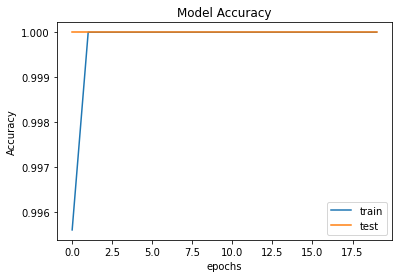

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [115]:
model.save('bAbI')

INFO:tensorflow:Assets written to: bAbI\assets


INFO:tensorflow:Assets written to: bAbI\assets


In [116]:
model.load_weights('bAbI')

In [117]:
pred_results=model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 0s 3ms/step


In [118]:
test[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [119]:
story=' '.join(word for word in test[21][0])
query=' '.join(word for word in test[21][1])
answer=''.join(word for word in test[21][2])

In [120]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway .'

In [121]:
query

'Is Mary in the kitchen ?'

In [122]:
answer

'no'

In [123]:
val_max=np.argmax(pred_results[21])

for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
        
print('Predicted Answer - ',k)
print('Probabiltiy of certainity - ',pred_results[21][val_max])

Predicted Answer -  yes
Probabiltiy of certainity -  1.0
